<a href="https://www.kaggle.com/code/sambhajizambre/notebookb741ab3e67?scriptVersionId=107198193" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [38]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/multilabel-cuisine-classification-on-us-data/Datafiniti_Fast_Food_Restaurants_May19.csv


 # ****Project Name : US Restaurant Cuisine Classification****

# #***Table of Contents***
1.Problem statement        
2.Data Import       
3.Data Inspection and Cleaning     
4.Exploratory Data Analysis (EDA)      
5.Preprocessing      
6.Model Building      
7.Evaluation of Models      
7.Conclusion      

# **Problem Statement**:-     
Market contest and problem summary for restaurant records in the YELP business database, details on type of cuisine served are captured .When a cuisine type as not been captured for a particular restaurant , cuisine types are assigned best on key words in the business name ,this process was originally created on AS400 and recently migrated to BDBX .due to system limitations, The process only assigns 35 of the piece -100_ cuisine types available in the YELP platform .in addition, these systems are only able to assign / stored one cuisine type per restaurant where the YELP platform allows the multiple.

# Import Libraries****

In [39]:
import pandas as pd
import numpy as np
from numpy import percentile
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
import re # for regular expressions
import pandas as pd 
pd.set_option("display.max_colwidth", 200) 
import string
import nltk # for text manipulation
from nltk.stem.porter import *
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from tqdm import tqdm

from sklearn.linear_model import LogisticRegression
from scipy import stats 
from sklearn import metrics 
from sklearn.metrics import mean_squared_error,mean_absolute_error, make_scorer,classification_report,confusion_matrix,accuracy_score,roc_auc_score,roc_curve
from sklearn.model_selection import train_test_split,cross_val_score,KFold
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.naive_bayes import BernoulliNB
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
import xgboost as xgb
import matplotlib.pyplot as plt # import matplotlib for graphs
import warnings 
warnings.filterwarnings("ignore")

from sklearn.pipeline import Pipeline
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.multiclass import OneVsRestClassifier

# **Data Import**

In [40]:
df=pd.read_csv("../input/multilabel-cuisine-classification-on-us-data/Datafiniti_Fast_Food_Restaurants_May19.csv",encoding='latin-1')
df.head()

,id,dateAdded,dateUpdated,address,categories,primaryCategories,city,country,keys,latitude,longitude,name,postalCode,province,sourceURLs,websites
0,AWrSh_KgsVYjT2BJAzaH,2019-05-19T23:58:05Z,2019-05-19T23:58:05Z,2555 11th Avenue,"Fast Food Restaurants,Hamburgers and Hot Dogs,Restaurants",Accommodation & Food Services,Greeley,US,us/co/greeley/255511thavenue/554191587,40.39629,-104.69699,Carl's Jr.,80631,CO,https://www.yellowpages.com/greeley-co/mip/carls-jr-7001402,https://www.carlsjr.com/?utm_source=Yextandutm_medium=Visit%20Websiteandutm_campaign=Homepage
1,AWEKlA-LIxWefVJwxG9B,2018-01-18T18:30:23Z,2019-05-19T23:45:05Z,2513 Highway 6 And 50,"Restaurant,Mexican Restaurants,Fast Food Restaurants,Restaurants",Accommodation & Food Services,Grand Junction,US,us/co/grandjunction/2513highway6and50/1550891556,39.08135,-108.58689,Del Taco,81505,CO,"http://www.citysearch.com/profile/772076870/grand_junction_co/del_taco.html,https://www.yellowpages.com/grand-junction-co/mip/del-taco-475739804,https://www.tripadvisor.com/Restaurant_Review-g3345...",http://www.deltaco.com
2,AWrSfAcYsVYjT2BJAzPt,2019-05-19T23:45:04Z,2019-05-19T23:45:04Z,1125 Patterson Road,"Sandwich Shops,Fast Food Restaurants,Restaurants,Take Out Restaurants",Accommodation & Food Services,Grand Junction,US,us/co/grandjunction/1125pattersonroad/-2137447852,39.09148,-108.55411,Which Wich,81506,CO,https://www.yellowpages.com/grand-junction-co/mip/which-wich-481453650,http://www.whichwich.com
3,AWrSa3NAQTFama1Xpkbz,2019-05-19T23:26:58Z,2019-05-19T23:26:58Z,3455 N Salida Court,"Fast Food Restaurants,Mexican Restaurants,Restaurants,Take Out Restaurants",Accommodation & Food Services,Aurora,US,us/co/aurora/3455nsalidacourt/1143321601,39.76369,-104.77671,Chipotle Mexican Grill,80011,CO,https://www.yellowpages.com/aurora-co/mip/chipotle-mexican-grill-537241840,http://www.chipotle.com
4,AWrSaVGzZ4Yw-wtdgcaB,2019-05-19T23:24:38Z,2019-05-19T23:24:38Z,5225 E Colfax Avenue,"Fast Food Restaurants,Mexican Restaurants,Restaurants",Accommodation & Food Services,Denver,US,us/co/denver/5225ecolfaxavenue/-864103396,39.74044,-104.92636,Taco Bell,80220,CO,https://www.yellowpages.com/denver-co/mip/taco-bell-459444587,https://locations.tacobell.com/co/denver/5225-e-colfax-ave.html?utm_source=yextandutm_campaign=yextpowerlistingsandutm_medium=referralandutm_term=004051andutm_content=website


1. **#Exploratory Data Analysis (EDA)**       
The first step of any machine learning problem is the EDA to have a better understanding of the data. The dataset contains many fields that are not relevant to this problem, and all genres are clustered within the same column.

# **Data Inspection**

In [41]:
# shape of dataset
print("Dataset dimension:")
print(df.shape)

Dataset dimension:
(10000, 16)


In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 10000 non-null  object 
 1   dateAdded          10000 non-null  object 
 2   dateUpdated        10000 non-null  object 
 3   address            10000 non-null  object 
 4   categories         10000 non-null  object 
 5   primaryCategories  10000 non-null  object 
 6   city               10000 non-null  object 
 7   country            10000 non-null  object 
 8   keys               10000 non-null  object 
 9   latitude           10000 non-null  float64
 10  longitude          10000 non-null  float64
 11  name               10000 non-null  object 
 12  postalCode         10000 non-null  object 
 13  province           10000 non-null  object 
 14  sourceURLs         10000 non-null  object 
 15  websites           9918 non-null   object 
dtypes: float64(2), object(1

**Finding Unique values in data**

In [43]:
df.nunique()

id                   10000
dateAdded             9455
dateUpdated           9327
address               9954
categories            5670
primaryCategories        1
city                  2810
country                  1
keys                 10000
latitude              9870
longitude             9886
name                  1545
postalCode            5310
province                47
sourceURLs           10000
websites              6215
dtype: int64

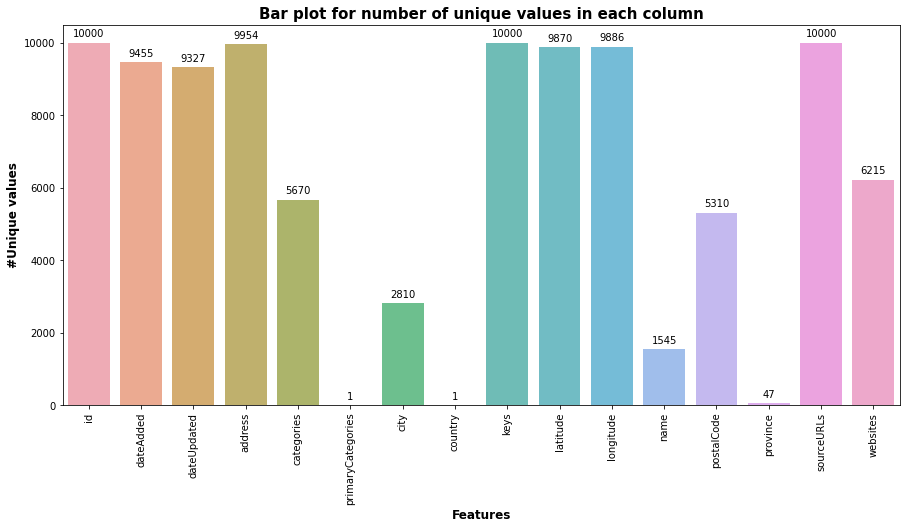

In [44]:
unique_df = pd.DataFrame()
unique_df['Features'] =df.columns
unique=[]
for i in df.columns:
    unique.append(df[i].nunique())
unique_df['Uniques'] = unique

f, ax = plt.subplots(1,1, figsize=(15,7))

splot = sns.barplot(x=unique_df['Features'], y=unique_df['Uniques'], alpha=0.8)
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center',
                   va = 'center', xytext = (0, 9), textcoords = 'offset points')
plt.title('Bar plot for number of unique values in each column',weight='bold', size=15)
plt.ylabel('#Unique values', size=12, weight='bold')
plt.xlabel('Features', size=12, weight='bold')
plt.xticks(rotation=90)
plt.show()

In [45]:
# check the data type of the columns
print("Data types:")
print(df.dtypes)

Data types:
id                    object
dateAdded             object
dateUpdated           object
address               object
categories            object
primaryCategories     object
city                  object
country               object
keys                  object
latitude             float64
longitude            float64
name                  object
postalCode            object
province              object
sourceURLs            object
websites              object
dtype: object


In [46]:
df.describe()

,latitude,longitude
count,10000.000000,10000.000000
mean,37.298215,-93.284547
std,5.566995,16.421424
min,19.639560,-159.464310
25%,33.850652,-98.342758
50%,37.490189,-86.677452
75%,40.808905,-81.803061
max,64.856880,-71.082180


In [47]:
df.head(10)

,id,dateAdded,dateUpdated,address,categories,primaryCategories,city,country,keys,latitude,longitude,name,postalCode,province,sourceURLs,websites
0,AWrSh_KgsVYjT2BJAzaH,2019-05-19T23:58:05Z,2019-05-19T23:58:05Z,2555 11th Avenue,"Fast Food Restaurants,Hamburgers and Hot Dogs,Restaurants",Accommodation & Food Services,Greeley,US,us/co/greeley/255511thavenue/554191587,40.396290,-104.696990,Carl's Jr.,80631,CO,https://www.yellowpages.com/greeley-co/mip/carls-jr-7001402,https://www.carlsjr.com/?utm_source=Yextandutm_medium=Visit%20Websiteandutm_campaign=Homepage
1,AWEKlA-LIxWefVJwxG9B,2018-01-18T18:30:23Z,2019-05-19T23:45:05Z,2513 Highway 6 And 50,"Restaurant,Mexican Restaurants,Fast Food Restaurants,Restaurants",Accommodation & Food Services,Grand Junction,US,us/co/grandjunction/2513highway6and50/1550891556,39.081350,-108.586890,Del Taco,81505,CO,"http://www.citysearch.com/profile/772076870/grand_junction_co/del_taco.html,https://www.yellowpages.com/grand-junction-co/mip/del-taco-475739804,https://www.tripadvisor.com/Restaurant_Review-g3345...",http://www.deltaco.com
2,AWrSfAcYsVYjT2BJAzPt,2019-05-19T23:45:04Z,2019-05-19T23:45:04Z,1125 Patterson Road,"Sandwich Shops,Fast Food Restaurants,Restaurants,Take Out Restaurants",Accommodation & Food Services,Grand Junction,US,us/co/grandjunction/1125pattersonroad/-2137447852,39.091480,-108.554110,Which Wich,81506,CO,https://www.yellowpages.com/grand-junction-co/mip/which-wich-481453650,http://www.whichwich.com
3,AWrSa3NAQTFama1Xpkbz,2019-05-19T23:26:58Z,2019-05-19T23:26:58Z,3455 N Salida Court,"Fast Food Restaurants,Mexican Restaurants,Restaurants,Take Out Restaurants",Accommodation & Food Services,Aurora,US,us/co/aurora/3455nsalidacourt/1143321601,39.763690,-104.776710,Chipotle Mexican Grill,80011,CO,https://www.yellowpages.com/aurora-co/mip/chipotle-mexican-grill-537241840,http://www.chipotle.com
4,AWrSaVGzZ4Yw-wtdgcaB,2019-05-19T23:24:38Z,2019-05-19T23:24:38Z,5225 E Colfax Avenue,"Fast Food Restaurants,Mexican Restaurants,Restaurants",Accommodation & Food Services,Denver,US,us/co/denver/5225ecolfaxavenue/-864103396,39.740440,-104.926360,Taco Bell,80220,CO,https://www.yellowpages.com/denver-co/mip/taco-bell-459444587,https://locations.tacobell.com/co/denver/5225-e-colfax-ave.html?utm_source=yextandutm_campaign=yextpowerlistingsandutm_medium=referralandutm_term=004051andutm_content=website
5,AWrSaQ5RZ4Yw-wtdgcZw,2019-05-19T23:24:21Z,2019-05-19T23:24:21Z,1350 W Colfax Avenue,"Fast Food Restaurants,Hamburgers and Hot Dogs,Restaurants,Take Out Restaurants",Accommodation & Food Services,Denver,US,us/co/denver/1350wcolfaxavenue/-1161002137,39.739670,-105.004670,McDonald's,80204,CO,https://www.yellowpages.com/denver-co/mip/mcdonalds-14897523,https://www.mcdonalds.com/us/en-us/location/CO/DENVER/1350-W-COLFAX/23659.html?cid=RF:YXT:RoN::Clicks
6,AWrSaQ4EsVYjT2BJAy_I,2019-05-19T23:24:21Z,2019-05-19T23:24:21Z,200 16th Street,"Fast Food Restaurants,Hamburgers and Hot Dogs,Restaurants,Take Out Restaurants",Accommodation & Food Services,Denver,US,us/co/denver/20016thstreet/-1161002137,39.741700,-104.988290,McDonald's,80202,CO,https://www.yellowpages.com/denver-co/mip/mcdonalds-503963739,https://www.mcdonalds.com/us/en-us/location/CO/DENVER/200-16TH-ST/4267.html?cid=RF:YXT:RoN::Clicks
7,AWCvDUHSIxWefVJwvq4y,2018-01-01T00:01:02Z,2019-05-19T22:58:35Z,1772 N College Ave,"Restaurant,Carry-out food,Mexican Restaurants,Tex-mex restaurants,Southwestern restaurants,Fast Food Restaurant,Mexican restaurants,Karaoke,Fast Food Restaurants,Restaurants",Accommodation & Food Services,Fayetteville,US,us/ar/fayetteville/1772ncollegeave/-864103396,36.085369,-94.155319,Taco Bell,72703,AR,"http://www.insiderpages.com/b/3709775090/taco-bell-fayetteville-16,https://foursquare.com/v/taco-bell/4bce90f9937ca59398d1ae92,https://www.allmenus.com/ar/fayetteville/204759-taco-bell/menu/,https...","http://www.tacobell.com/,http://www.tacobell.com"
8,AWrSTT3sQTFama1Xpjyq,2019-05-19T22:53:58Z,2019-05-19T22:53:58Z,605 S Havana Street,"

***Correlation matrix*** 
**Heatmap***

<AxesSubplot:>

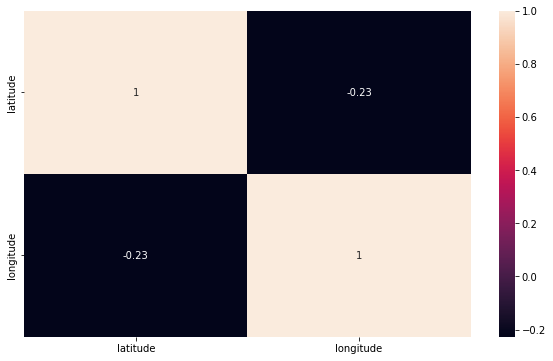

In [48]:
cor=df.corr()
plt.figure(figsize=(10,6))
sns.heatmap(cor,annot=True)

In [49]:
#checking null values
df.isna().sum()

id                    0
dateAdded             0
dateUpdated           0
address               0
categories            0
primaryCategories     0
city                  0
country               0
keys                  0
latitude              0
longitude             0
name                  0
postalCode            0
province              0
sourceURLs            0
websites             82
dtype: int64

**There is only null values in website variable.**

<AxesSubplot:>

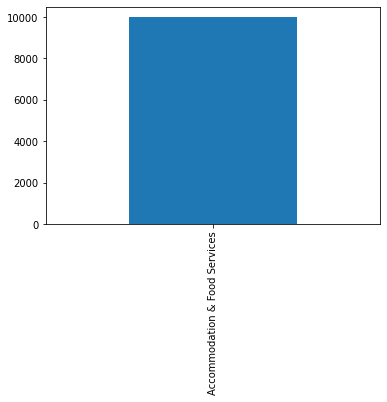

In [50]:
df['primaryCategories'].value_counts()[:10].plot(kind='bar')

<AxesSubplot:>

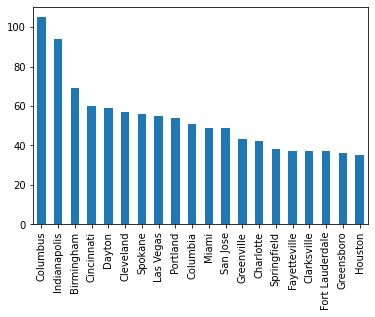

In [51]:
#looking into city variable
df['city'].value_counts()[:20].plot(kind= 'bar')

***Let's explore the data now!***

*Among the 16 columns we have*:

1 column with fastfood restaraunt's name: [name]

2 date in data columns: [dateAdded, dateUpdated]

2 fast food category columns: [categories, primaryCategories]

7 location data columns: [address, city, country, latitude, longtitude, postalCode, province]  

8. Other columns :-    id, keys, sourceURLs, and websites

**Number of unique restaurants**

In [52]:
print("Number of unique restaurant:", df['name'].nunique())

Number of unique restaurant: 1545


**Top 20 restaurants**

<AxesSubplot:>

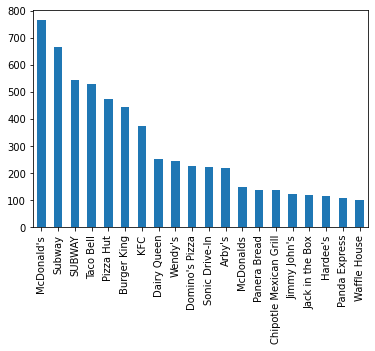

In [53]:
df['name'].value_counts()[:20].plot(kind= 'bar')

**Plot Of Top 15 Locations Of Tweet.**

In [54]:
import plotly.graph_objects as go
loc_analysis = pd.DataFrame(df['city'].value_counts().sort_values(ascending=False))
loc_analysis = loc_analysis.rename(columns={'city':'count'})

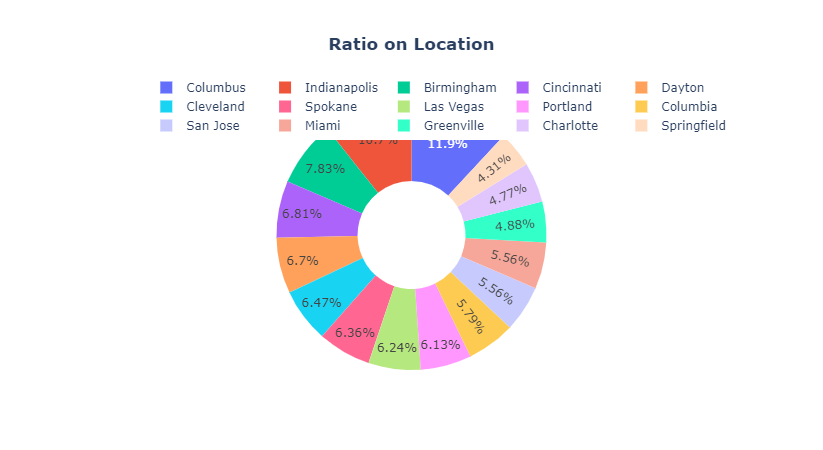

In [55]:
data = {
   "values": loc_analysis['count'][:15],
   "labels": loc_analysis.index[:15],
   "domain": {"column": 0},
   "name": "Location Name",
   "hoverinfo":"label+percent+name",
   "hole": .4,
   "type": "pie"
}
layout = go.Layout(title="<b>Ratio on Location</b>", legend=dict(x=0.1, y=1.1, orientation="h"))

data = [data]
fig = go.Figure(data = data, layout = layout)
fig.update_layout(title_x=0.5)
fig.show()

In [56]:
# get top 3 fast food populated cities
top3_fastfood_populated_cities = df['city'].value_counts()[:3].index.tolist()
top3_fastfood_populated_cities[:3]

['Columbus', 'Indianapolis', 'Birmingham']

In [57]:
# get the restaurant number count by unique restaurant name
def get_restaurants_counts(city_name):
    return df[df["city"]==city_name]["name"].value_counts()

# print the restaurants that opened more than 1 shop
def print_more_than_1_shop_rest(restaurants, city_name):
    more_than_1_shops = restaurants[restaurants > 1]
    print("\nAmong", len(restaurants), "unique fastfood restaurant brands in", city_name+",")
    print(len(more_than_1_shops), "brands opened more than 1 shops.")
    print("They occupied", str(round(len(more_than_1_shops)/sum(restaurants)*100,2))+
          "% of total restaurants by number")
    print(more_than_1_shops)

In [58]:
# let's generate a quick summary of the shops
for city in top3_fastfood_populated_cities:
    print_more_than_1_shop_rest(get_restaurants_counts(city), city)


Among 55 unique fastfood restaurant brands in Columbus,
17 brands opened more than 1 shops.
They occupied 16.19% of total restaurants by number
SUBWAY                    13
Subway                     8
McDonald's                 7
Pizza Hut                  6
Chipotle Mexican Grill     6
Panera Bread               3
Domino's Pizza             3
Dairy Queen                3
Arby's                     2
Waffle House               2
Bob Evans                  2
Wendy's                    2
WG Grinders                2
Churchs Chicken            2
Moe's Southwest Grill      2
Panda Express              2
McDonalds                  2
Name: name, dtype: int64

Among 53 unique fastfood restaurant brands in Indianapolis,
19 brands opened more than 1 shops.
They occupied 20.21% of total restaurants by number
Pizza Hut                  8
Dairy Queen                6
SUBWAY                     5
Jimmy John's               4
Steak 'n Shake             4
Church's Chicken           4
Domino's Pizza

In [59]:
# reusable function to create data needed for plotting pie chart
def create_pie_chart_data(city_name):
    counts =  df[df["city"]==city_name]["name"].value_counts()[:10].values
    labels = df[df["city"]==city_name]["name"].value_counts().index.tolist()[:10]
    return counts, labels
# reusable function to plot pie chart for our EDA
def plot_pie_chart(counts, labels, city_name):
    fig, ax = plt.subplots()
    ax.pie(counts, labels=labels, autopct='%.1f%%', radius=1.1, 
          explode = (0.1, 0, 0, 0, 0, 0, 0, 0, 0, 0))
    ax.set_aspect('equal')
    ax.set_title("Top 10 Restaurants in " + city_name)
    plt.show()

['SUBWAY', 'Subway', "McDonald's"] are the top 3 populated restaurants in Columbus


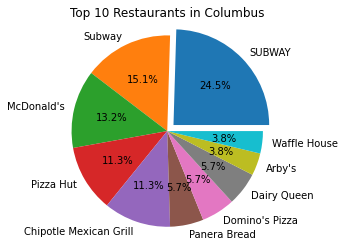

['Pizza Hut', 'Dairy Queen', 'SUBWAY'] are the top 3 populated restaurants in Indianapolis


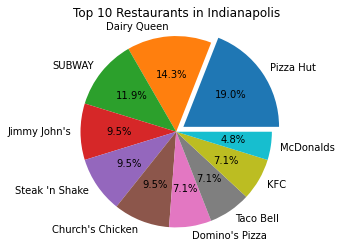

["McDonald's", 'Subway', "Jimmy John's"] are the top 3 populated restaurants in Birmingham


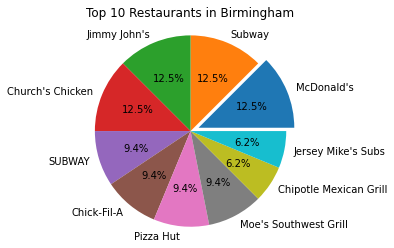

In [60]:
# for each city, let's create the data needed and plot them in pie chart
for city in top3_fastfood_populated_cities:
    counts, labels = create_pie_chart_data(city)
    print(labels[:3], "are the top 3 populated restaurants in", city)
    plot_pie_chart(counts, labels, city)

In [61]:
from plotly.offline import init_notebook_mode, iplot
from plotly.graph_objs import *
init_notebook_mode(connected=True)
import plotly.graph_objs as go

**Mapping of Restaurnts on the Map**

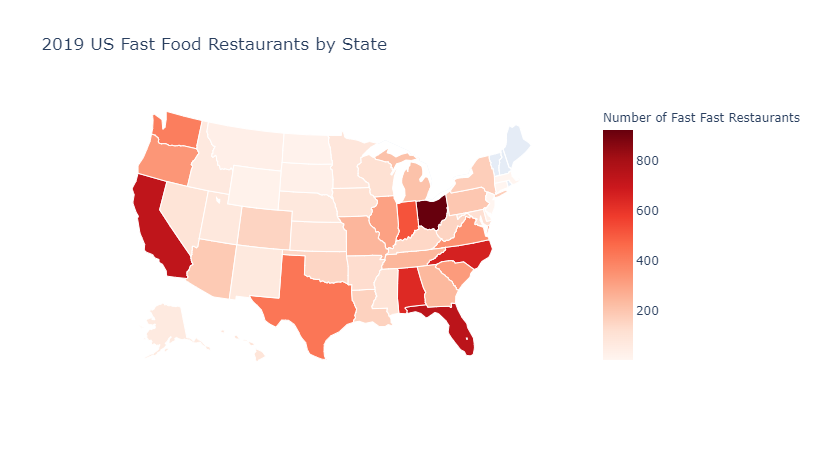

In [62]:
# create data needed
state_codes = df['province'].value_counts().index.tolist()
value_counts_by_states = df['province'].value_counts()

# plotly choropleth
data= [dict(type='choropleth',
            locations = state_codes, # Spatial coordinates
            z = value_counts_by_states, # Data to be color-coded
            locationmode = 'USA-states', # set of locations match entries in `locations`
            colorscale = 'Reds',
            marker_line_color = 'white',
            colorbar_title = "Number of Fast Fast Restaurants"
        )]
layout = dict(title = '2019 US Fast Food Restaurants by State', 
              geo = dict(scope='usa'))
iplot(dict(data=data, layout=layout))

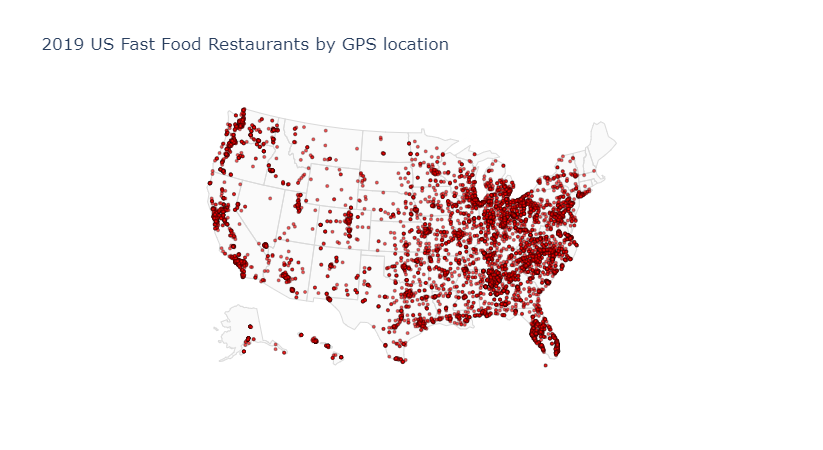

In [63]:
data = [dict(type = 'scattergeo',
            locationmode = 'USA-states',
            lon = df['longitude'],
            lat = df['latitude'],
            mode = 'markers',
            marker = dict(size = 3,
                opacity = 0.7,
                reversescale = True,
                autocolorscale = False,
                symbol = 'circle',
                line = dict(width=.5, color='black'),
                color = 'red'
            )
        )]

layout = dict(title = '2019 US Fast Food Restaurants by GPS location',
            geo = dict(scope='usa',
                showland = True,
                landcolor = "rgb(250, 250, 250)",
                subunitcolor = "rgb(217, 217, 217)"
            )
        )
iplot(dict(data=data, layout=layout ))

# **Data Cleaning**

# Let's drop id, keys, sourceURLs, and websites first

In [64]:
# the id, keys, sourceURLs, and websites are unique identifier
# we don't need them in our visualizations
df = df.drop(['id', 'keys', 'sourceURLs', 'websites'], axis=1)

# shape of dataset
print("Dimension after dropping columns:")
print(df.shape)

# take a peek at the head to verify the drop is successful
df.head()

Dimension after dropping columns:
(10000, 12)


,dateAdded,dateUpdated,address,categories,primaryCategories,city,country,latitude,longitude,name,postalCode,province
0,2019-05-19T23:58:05Z,2019-05-19T23:58:05Z,2555 11th Avenue,"Fast Food Restaurants,Hamburgers and Hot Dogs,Restaurants",Accommodation & Food Services,Greeley,US,40.39629,-104.69699,Carl's Jr.,80631,CO
1,2018-01-18T18:30:23Z,2019-05-19T23:45:05Z,2513 Highway 6 And 50,"Restaurant,Mexican Restaurants,Fast Food Restaurants,Restaurants",Accommodation & Food Services,Grand Junction,US,39.08135,-108.58689,Del Taco,81505,CO
2,2019-05-19T23:45:04Z,2019-05-19T23:45:04Z,1125 Patterson Road,"Sandwich Shops,Fast Food Restaurants,Restaurants,Take Out Restaurants",Accommodation & Food Services,Grand Junction,US,39.09148,-108.55411,Which Wich,81506,CO
3,2019-05-19T23:26:58Z,2019-05-19T23:26:58Z,3455 N Salida Court,"Fast Food Restaurants,Mexican Restaurants,Restaurants,Take Out Restaurants",Accommodation & Food Services,Aurora,US,39.76369,-104.77671,Chipotle Mexican Grill,80011,CO
4,2019-05-19T23:24:38Z,2019-05-19T23:24:38Z,5225 E Colfax Avenue,"Fast Food Restaurants,Mexican Restaurants,Restaurants",Accommodation & Food Services,Denver,US,39.74044,-104.92636,Taco Bell,80220,CO


**Convert all text in Lower case**

In [65]:
df['new_categories']=df['categories'].apply(lambda x:x.lower())

In [66]:
df[['categories','new_categories']].head(5)

,categories,new_categories
0,"Fast Food Restaurants,Hamburgers and Hot Dogs,Restaurants","fast food restaurants,hamburgers and hot dogs,restaurants"
1,"Restaurant,Mexican Restaurants,Fast Food Restaurants,Restaurants","restaurant,mexican restaurants,fast food restaurants,restaurants"
2,"Sandwich Shops,Fast Food Restaurants,Restaurants,Take Out Restaurants","sandwich shops,fast food restaurants,restaurants,take out restaurants"
3,"Fast Food Restaurants,Mexican Restaurants,Restaurants,Take Out Restaurants","fast food restaurants,mexican restaurants,restaurants,take out restaurants"
4,"Fast Food Restaurants,Mexican Restaurants,Restaurants","fast food restaurants,mexican restaurants,restaurants"


**Removing Stop Words**

In [67]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [68]:
import nltk
from nltk.corpus import stopwords

In [69]:
allstopwords = stopwords.words('english')
df['new_categories'] =df['new_categories'].apply(lambda x: " ".join(i for i in x.split() if i not in allstopwords))
df[['categories','new_categories']].head(5)

,categories,new_categories
0,"Fast Food Restaurants,Hamburgers and Hot Dogs,Restaurants","fast food restaurants,hamburgers hot dogs,restaurants"
1,"Restaurant,Mexican Restaurants,Fast Food Restaurants,Restaurants","restaurant,mexican restaurants,fast food restaurants,restaurants"
2,"Sandwich Shops,Fast Food Restaurants,Restaurants,Take Out Restaurants","sandwich shops,fast food restaurants,restaurants,take restaurants"
3,"Fast Food Restaurants,Mexican Restaurants,Restaurants,Take Out Restaurants","fast food restaurants,mexican restaurants,restaurants,take restaurants"
4,"Fast Food Restaurants,Mexican Restaurants,Restaurants","fast food restaurants,mexican restaurants,restaurants"


**Removing unwanted text patterns from the categories**

In [70]:
#remove unwanted text patterns from the categories
def remove_pattern(input_txt,pattern):
  r = re.findall(pattern,input_txt)
  for i in r:
    input_txt = re.sub(i,'',input_txt)
  return input_txt

In [71]:
df['new_categories'] = np.vectorize(remove_pattern)(df['new_categories'],'restaurants')
df['new_categories'] = np.vectorize(remove_pattern)(df['new_categories'],'restaurant')
df['new_categories'] = np.vectorize(remove_pattern)(df['new_categories'],'take out')
df['new_categories'] = np.vectorize(remove_pattern)(df['new_categories'],'carry-out food')
df['new_categories'] = np.vectorize(remove_pattern)(df['new_categories'],'manufacturers')
df['new_categories'] = np.vectorize(remove_pattern)(df['new_categories'],'cypress station')
df['new_categories'] = np.vectorize(remove_pattern)(df['new_categories'],'caterers')
df['new_categories'] = np.vectorize(remove_pattern)(df['new_categories'],'delivery service')
df['new_categories'] = np.vectorize(remove_pattern)(df['new_categories'],'uncategorized')
df['new_categories'] = np.vectorize(remove_pattern)(df['new_categories'],'women\'s clothing')
df['new_categories'] = np.vectorize(remove_pattern)(df['new_categories'],'delis')
df['new_categories'] = np.vectorize(remove_pattern)(df['new_categories'],'hotels and motel')
df['new_categories'] = np.vectorize(remove_pattern)(df['new_categories'],'&')
df['new_categories'] = np.vectorize(remove_pattern)(df['new_categories'],'catering')
df['new_categories'] = np.vectorize(remove_pattern)(df['new_categories'],'airport devonshire')
df['new_categories'] = np.vectorize(remove_pattern)(df['new_categories'],'airport')
df['new_categories'] = np.vectorize(remove_pattern)(df['new_categories'],"bars")
df['new_categories'] = np.vectorize(remove_pattern)(df['new_categories'],'- full service')
df['new_categories'] = np.vectorize(remove_pattern)(df['new_categories'],'clubs')
df['new_categories'] = np.vectorize(remove_pattern)(df['new_categories'],"pubs")
df['new_categories'] = np.vectorize(remove_pattern)(df['new_categories'],'american canoga park')
df['new_categories'] = np.vectorize(remove_pattern)(df['new_categories'],'american cape fear')
df['new_categories'] = np.vectorize(remove_pattern)(df['new_categories'],"american downtown blacksburg	")
df['new_categories'] = np.vectorize(remove_pattern)(df['new_categories'],'  american canoga park')

In [72]:
df[['categories','new_categories']].head(5)

,categories,new_categories
0,"Fast Food Restaurants,Hamburgers and Hot Dogs,Restaurants","fast food ,hamburgers hot dogs,"
1,"Restaurant,Mexican Restaurants,Fast Food Restaurants,Restaurants",",mexican ,fast food ,"
2,"Sandwich Shops,Fast Food Restaurants,Restaurants,Take Out Restaurants","sandwich shops,fast food ,,take"
3,"Fast Food Restaurants,Mexican Restaurants,Restaurants,Take Out Restaurants","fast food ,mexican ,,take"
4,"Fast Food Restaurants,Mexican Restaurants,Restaurants","fast food ,mexican ,"


In [73]:
#mapping: Analysis of the Latitiude and Longitude
# Explore the pickup latitude and longitudes
df['latitude'].describe()

count    10000.000000
mean        37.298215
std          5.566995
min         19.639560
25%         33.850652
50%         37.490189
75%         40.808905
max         64.856880
Name: latitude, dtype: float64

In [74]:
df['longitude'].describe()

count    10000.000000
mean       -93.284547
std         16.421424
min       -159.464310
25%        -98.342758
50%        -86.677452
75%        -81.803061
max        -71.082180
Name: longitude, dtype: float64

# **Feature Engineering**

lets cluster all the details about address including city country latitude,longitude,province under a single column called detailed address column

In [76]:
# address, city, country, lattitude, longitude, name, postal code, province, website
df["detailed_address"] = df["name"] + df["address"]+  df["city"] + df["country"]+ df["latitude"].astype(str) + df["longitude"].astype(str)+ df["postalCode"] +df["province"]

In [79]:
df1 = df[["detailed_address","categories"]]
df1.head()

,detailed_address,categories
0,Carl's Jr.2555 11th AvenueGreeleyUS40.39629-104.6969980631CO,"Fast Food Restaurants,Hamburgers and Hot Dogs,Restaurants"
1,Del Taco2513 Highway 6 And 50Grand JunctionUS39.08135-108.5868981505CO,"Restaurant,Mexican Restaurants,Fast Food Restaurants,Restaurants"
2,Which Wich1125 Patterson RoadGrand JunctionUS39.09148-108.5541181506CO,"Sandwich Shops,Fast Food Restaurants,Restaurants,Take Out Restaurants"
3,Chipotle Mexican Grill3455 N Salida CourtAuroraUS39.76369-104.7767180011CO,"Fast Food Restaurants,Mexican Restaurants,Restaurants,Take Out Restaurants"
4,Taco Bell5225 E Colfax AvenueDenverUS39.74044-104.9263680220CO,"Fast Food Restaurants,Mexican Restaurants,Restaurants"


In [80]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   detailed_address  10000 non-null  object
 1   categories        10000 non-null  object
dtypes: object(2)
memory usage: 156.4+ KB


In [81]:
df1["categories"] = df["categories"].map(lambda x: x.lower())
df1.head(10)

,detailed_address,categories
0,Carl's Jr.2555 11th AvenueGreeleyUS40.39629-104.6969980631CO,"fast food restaurants,hamburgers and hot dogs,restaurants"
1,Del Taco2513 Highway 6 And 50Grand JunctionUS39.08135-108.5868981505CO,"restaurant,mexican restaurants,fast food restaurants,restaurants"
2,Which Wich1125 Patterson RoadGrand JunctionUS39.09148-108.5541181506CO,"sandwich shops,fast food restaurants,restaurants,take out restaurants"
3,Chipotle Mexican Grill3455 N Salida CourtAuroraUS39.76369-104.7767180011CO,"fast food restaurants,mexican restaurants,restaurants,take out restaurants"
4,Taco Bell5225 E Colfax AvenueDenverUS39.74044-104.9263680220CO,"fast food restaurants,mexican restaurants,restaurants"
5,McDonald's1350 W Colfax AvenueDenverUS39.73967-105.0046780204CO,"fast food restaurants,hamburgers and hot dogs,restaurants,take out restaurants"
6,McDonald's200 16th StreetDenverUS39.7417-104.9882980202CO,"fast food restaurants,hamburgers and hot dogs,restaurants,take out restaurants"
7,Taco Bell1772 N College AveFayettevilleUS36.085369-94.15531972703AR,"restaurant,carry-out food,mexican restaurants,tex-mex restaurants,southwestern restaurants,fast food restaurant,mexican restaurants,karaoke,fast food restaurants,restaurants"
8,Captain D's Seafood Kitchen605 S Havana StreetAuroraUS39.70534-104.8663380012CO,"fast food restaurants,american restaurants,family style restaurants,restaurants,seafood restaurants"
9,Shondiz16th Glenarm PlaceDenverUS39.749107-104.9945980202CO,"mexican restaurants,caterers,greek restaurants,mediterranean restaurants,latin american restaurants,fast food restaurants,restaurants"


In [82]:
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i,'',input_txt)
    return input_txt

# **Preprocessing**

**lets remove the unwanted data or the redundant cloud first we have to converted it into lower case so all words will be in lower case.then we will remove the words by checking same pattern**


In [83]:
df1['categories'] = np.vectorize(remove_pattern)(df1['categories'], 'restaurants')
df1['categories'] = np.vectorize(remove_pattern)(df1['categories'], 'carry-out food')
df1['categories'] = np.vectorize(remove_pattern)(df1['categories'], 'karaoke')
df1['categories'] = np.vectorize(remove_pattern)(df1['categories'], 'take out')
df1['categories'] = np.vectorize(remove_pattern)(df1['categories'], 'caterers')
df1['categories'] = np.vectorize(remove_pattern)(df1['categories'], 'family style restaurants')
df1['categories'] = np.vectorize(remove_pattern)(df1['categories'], 'delicatessens')
df1['categories'] = np.vectorize(remove_pattern)(df1['categories'], 'restaurant')
df1['categories'] = np.vectorize(remove_pattern)(df1['categories'], 'home delivery beer and beverages')
df1['categories'] = np.vectorize(remove_pattern)(df1['categories'], 'delivery service')
df1['categories'] = np.vectorize(remove_pattern)(df1['categories'], 'sports bar')
df1['categories'] = np.vectorize(remove_pattern)(df1['categories'], 'family style')
df1['categories'] = np.vectorize(remove_pattern)(df1['categories'], 'place')
df1['categories'] = np.vectorize(remove_pattern)(df1['categories'], '&')
df1['categories'] = np.vectorize(remove_pattern)(df1['categories'], "women's clothing")
df1['categories'] = np.vectorize(remove_pattern)(df1['categories'], 'bars')
df1['categories'] = np.vectorize(remove_pattern)(df1['categories'], 'southwestern')
df1['categories'] = np.vectorize(remove_pattern)(df1['categories'], 'joint')
df1['categories'] = np.vectorize(remove_pattern)(df1['categories'], 'hotel and motel reservations')
df1['categories'] = np.vectorize(remove_pattern)(df1['categories'], 'banquet halls & reception facilities')
df1['categories'] = np.vectorize(remove_pattern)(df1['categories'], 'delis')
df1['categories'] = np.vectorize(remove_pattern)(df1['categories'], 'service stations')
df1['categories'] = np.vectorize(remove_pattern)(df1['categories'], 'stands')
df1['categories'] = np.vectorize(remove_pattern)(df1['categories'], 'fraternal organizations')
df1['categories'] = np.vectorize(remove_pattern)(df1['categories'], 'tourism')
df1['categories'] = np.vectorize(remove_pattern)(df1['categories'], 'shops')
df1['categories'] = np.vectorize(remove_pattern)(df1['categories'], 'cocktail lounges')
df1['categories'] = np.vectorize(remove_pattern)(df1['categories'], 'cypress station')
df1['categories'] = np.vectorize(remove_pattern)(df1['categories'], 'family friendly')
df1['categories'] = np.vectorize(remove_pattern)(df1['categories'], 'convenience stores')
df1['categories'] = np.vectorize(remove_pattern)(df1['categories'], 'bar and grills')
df1['categories'] = np.vectorize(remove_pattern)(df1['categories'], 'food delivery')
df1['categories'] = np.vectorize(remove_pattern)(df1['categories'], 'manufacturers')
df1['categories'] = np.vectorize(remove_pattern)(df1['categories'], 'clubs')
df1['categories'] = np.vectorize(remove_pattern)(df1['categories'], 'pubs')
df1['categories'] = np.vectorize(remove_pattern)(df1['categories'], 'takeout')
df1['categories'] = np.vectorize(remove_pattern)(df1['categories'], 'airport')
df1['categories'] = np.vectorize(remove_pattern)(df1['categories'], 'full service')
df1['categories'] = np.vectorize(remove_pattern)(df1['categories'], 'devonshire')
df1['categories'] = np.vectorize(remove_pattern)(df1['categories'], 'youngstown')
df1['categories'] = np.vectorize(remove_pattern)(df1['categories'], 'yuma')
df1['categories'] = np.vectorize(remove_pattern)(df1['categories'], 'shops')
df1['categories'] = np.vectorize(remove_pattern)(df1['categories'], 'restaurant delivery service')
df1['categories'] = np.vectorize(remove_pattern)(df1['categories'], 'southwestern restaurants')
df1['categories'] = np.vectorize(remove_pattern)(df1['categories'], 'ale')
df1['categories'] = np.vectorize(remove_pattern)(df1['categories'], 'ale-wholesale')
df1['categories'] = np.vectorize(remove_pattern)(df1['categories'], 'distributors')
df1['categories'] = np.vectorize(remove_pattern)(df1['categories'], ' american canoga park')
df1['categories'] = np.vectorize(remove_pattern)(df1['categories'], 'barbecued poultry')
df1['categories'] = np.vectorize(remove_pattern)(df1['categories'], 'frozen desserts')
df1['categories'] = np.vectorize(remove_pattern)(df1['categories'], 'wine')
df1['categories'] = np.vectorize(remove_pattern)(df1['categories'], 'shop')
df1['categories'] = np.vectorize(remove_pattern)(df1['categories'], 'stores')
df1['categories'] = np.vectorize(remove_pattern)(df1['categories'], 'catering')
df1['categories'] = np.vectorize(remove_pattern)(df1['categories'], '')
df1['categories'] = np.vectorize(remove_pattern)(df1['categories'], 'wilmington')
df1['categories'] = np.vectorize(remove_pattern)(df1['categories'], 'willard ')
df1['categories'] = np.vectorize(remove_pattern)(df1['categories'], ' -retail')
df1['categories'] = np.vectorize(remove_pattern)(df1['categories'], ' -wholes')
df1['categories'] = np.vectorize(remove_pattern)(df1['categories'], ' -')
df1['categories'] = np.vectorize(remove_pattern)(df1['categories'], 'wi-fi hotspots')
df1['categories'] = np.vectorize(remove_pattern)(df1['categories'], 'caterer')
df1['categories'] = np.vectorize(remove_pattern)(df1['categories'], 'spare rib ')
df1['categories'] = np.vectorize(remove_pattern)(df1['categories'], ' american  cape fear')
df1['categories'] = np.vectorize(remove_pattern)(df1['categories'], ' american  downtown beaverton')
df1['categories'] = np.vectorize(remove_pattern)(df1['categories'], ' american  downtown blacksburg')
df1['categories'] = np.vectorize(remove_pattern)(df1['categories'], ' american  colonial avenue area')
df1['categories'] = np.vectorize(remove_pattern)(df1['categories'], 'wholes importers')
df1['categories'] = np.vectorize(remove_pattern)(df1['categories'], 'wholes seafood')
df1['categories'] = np.vectorize(remove_pattern)(df1['categories'], 'wholes locks  locksmiths')
df1['categories'] = np.vectorize(remove_pattern)(df1['categories'], 'wholes')
df1['categories'] = np.vectorize(remove_pattern)(df1['categories'], ' american  canoga park')
df1['categories'] = np.vectorize(remove_pattern)(df1['categories'], ' beach')

df1['categories'] = np.vectorize(remove_pattern)(df1['categories'], ' downtown blacksburg')
df1['categories'] = np.vectorize(remove_pattern)(df1['categories'], ' downtown charleston')
df1['categories'] = np.vectorize(remove_pattern)(df1['categories'], ' highland lakes center')
df1['categories'] = np.vectorize(remove_pattern)(df1['categories'], ' idlewild south')
df1['categories'] = np.vectorize(remove_pattern)(df1['categories'], ' cumberland')
df1['categories'] = np.vectorize(remove_pattern)(df1['categories'], ' fishhawk')
df1['categories'] = np.vectorize(remove_pattern)(df1['categories'],  ' caf arden - arcade')
df1['categories'] = np.vectorize(remove_pattern)(df1['categories'], ' caf hancock')
df1['categories'] = np.vectorize(remove_pattern)(df1['categories'], ' caf mission bay')
df1['categories'] = np.vectorize(remove_pattern)(df1['categories'], ' caf northeast raleigh')
df1['categories'] = np.vectorize(remove_pattern)(df1['categories'],  ' chapels')
df1['categories'] = np.vectorize(remove_pattern)(df1['categories'], ' chinese  crossroads area')
df1['categories'] = np.vectorize(remove_pattern)(df1['categories'], ' cocktail bar')
df1['categories'] = np.vectorize(remove_pattern)(df1['categories'], ' coffee shop')
df1['categories'] = np.vectorize(remove_pattern)(df1['categories'], ' consultants')
df1['categories'] = np.vectorize(remove_pattern)(df1['categories'], ' deli / bodega')
df1['categories'] = np.vectorize(remove_pattern)(df1['categories'], ' delicatessens')
df1['categories'] = np.vectorize(remove_pattern)(df1['categories'], ' dessert shop')
df1['categories'] = np.vectorize(remove_pattern)(df1['categories'], ' equipment')
df1['categories'] = np.vectorize(remove_pattern)(df1['categories'], ' dog run')
df1['categories'] = np.vectorize(remove_pattern)(df1['categories'], ' equipment')
df1['categories'] = np.vectorize(remove_pattern)(df1['categories'], ' equipment supplies')
df1['categories'] = np.vectorize(remove_pattern)(df1['categories'], ' etc.')
df1['categories'] = np.vectorize(remove_pattern)(df1['categories'], ' facilities')
df1['categories'] = np.vectorize(remove_pattern)(df1['categories'], ' downtown blacksburg')
df1['categories'] = np.vectorize(remove_pattern)(df1['categories'], 'downtown charleston')
df1['categories'] = np.vectorize(remove_pattern)(df1['categories'], ' southeast oklahoma city')
df1['categories'] = np.vectorize(remove_pattern)(df1['categories'], ' washington park')
df1['categories'] = np.vectorize(remove_pattern)(df1['categories'], ' food court')
df1['categories'] = np.vectorize(remove_pattern)(df1['categories'], ' food tioga - nicetown')
df1['categories'] = np.vectorize(remove_pattern)(df1['categories'], ' freezers refrigerating equipment')
df1['categories'] = np.vectorize(remove_pattern)(df1['categories'], ' village west')
df1['categories'] = np.vectorize(remove_pattern)(df1['categories'], ' industrial medical gas' )
df1['categories'] = np.vectorize(remove_pattern)(df1['categories'], ' inglewood')
df1['categories'] = np.vectorize(remove_pattern)(df1['categories'], ' preston park')
df1['categories'] = np.vectorize(remove_pattern)(df1['categories'], ' lounge')
df1['categories'] = np.vectorize(remove_pattern)(df1['categories'], ' management consultants')
df1['categories'] = np.vectorize(remove_pattern)(df1['categories'], ' menus')
df1['categories'] = np.vectorize(remove_pattern)(df1['categories'], ' merchandise supplies')
df1['categories'] = np.vectorize(remove_pattern)(df1['categories'], 'south ames business')
df1['categories'] = np.vectorize(remove_pattern)(df1['categories'], ' mgmt.')
df1['categories'] = np.vectorize(remove_pattern)(df1['categories'], ' nc')
df1['categories'] = np.vectorize(remove_pattern)(df1['categories'], ' office')
df1['categories'] = np.vectorize(remove_pattern)(df1['categories'], ' referral services  guides')
df1['categories'] = np.vectorize(remove_pattern)(df1['categories'], ' sales service')
df1['categories'] = np.vectorize(remove_pattern)(df1['categories'], ' salon / barbershop')
df1['categories'] = np.vectorize(remove_pattern)(df1['categories'], 'airpark ')
df1['categories'] = np.vectorize(remove_pattern)(df1['categories'], 'central newport news ')
df1['categories'] = np.vectorize(remove_pattern)(df1['categories'], 'central westminster')
df1['categories'] = np.vectorize(remove_pattern)(df1['categories'], 'eastland')
df1['categories'] = np.vectorize(remove_pattern)(df1['categories'], 'easton commons ')
df1['categories'] = np.vectorize(remove_pattern)(df1['categories'], 'northwest oklahoma city ')
df1['categories'] = np.vectorize(remove_pattern)(df1['categories'], 'swann estates ')
df1['categories'] = np.vectorize(remove_pattern)(df1['categories'], 'tulsa hills ')
df1['categories'] = np.vectorize(remove_pattern)(df1['categories'], 'university ')
df1['categories'] = np.vectorize(remove_pattern)(df1['categories'], 'vcu')
df1['categories'] = np.vectorize(remove_pattern)(df1['categories'], 'west arlington ')
df1['categories'] = np.vectorize(remove_pattern)(df1['categories'], 'boca del mar ')
df1['categories'] = np.vectorize(remove_pattern)(df1['categories'], 'central college ')
df1['categories'] = np.vectorize(remove_pattern)(df1['categories'], 'colonial avenue area ')
df1['categories'] = np.vectorize(remove_pattern)(df1['categories'], 'coral way ')
df1['categories'] = np.vectorize(remove_pattern)(df1['categories'], 'downtown blacksburg ')
df1['categories'] = np.vectorize(remove_pattern)(df1['categories'], 'east columbus ')
df1['categories'] = np.vectorize(remove_pattern)(df1['categories'], 'financial district ')
df1['categories'] = np.vectorize(remove_pattern)(df1['categories'], 'first hill ')
df1['categories'] = np.vectorize(remove_pattern)(df1['categories'], 'glen echo ')
df1['categories'] = np.vectorize(remove_pattern)(df1['categories'], "kamm's corners ")
df1['categories'] = np.vectorize(remove_pattern)(df1['categories'], 'northeast boca raton ')
df1['categories'] = np.vectorize(remove_pattern)(df1['categories'], 'northgate ')
df1['categories'] = np.vectorize(remove_pattern)(df1['categories'], 'pearl ')
df1['categories'] = np.vectorize(remove_pattern)(df1['categories'], 'sherwood - tualatin south ')
df1['categories'] = np.vectorize(remove_pattern)(df1['categories'], 'short north ')
df1['categories'] = np.vectorize(remove_pattern)(df1['categories'], 'university ')
df1['categories'] = np.vectorize(remove_pattern)(df1['categories'], ' video tapes-whol. mfrs.')
df1['categories'] = np.vectorize(remove_pattern)(df1['categories'], 'aa bowls')
df1['categories'] = np.vectorize(remove_pattern)(df1['categories'], 'abbeville')
df1['categories'] = np.vectorize(remove_pattern)(df1['categories'], 'abingdon ')
df1['categories'] = np.vectorize(remove_pattern)(df1['categories'], 'accounting bookkeeping')
df1['categories'] = np.vectorize(remove_pattern)(df1['categories'], 'acne treatment')
df1['categories'] = np.vectorize(remove_pattern)(df1['categories'], 'air cargo package express service')
df1['categories'] = np.vectorize(remove_pattern)(df1['categories'], 'air fresheners')
df1['categories'] = np.vectorize(remove_pattern)(df1['categories'], 'albuquerque ')
df1['categories'] = np.vectorize(remove_pattern)(df1['categories'], 'alteration tailoring supplies')
df1['categories'] = np.vectorize(remove_pattern)(df1['categories'], 'alterations tailoring')
df1['categories'] = np.vectorize(remove_pattern)(df1['categories'], 'alternative complementary medicine')
df1['categories'] = np.vectorize(remove_pattern)(df1['categories'], 'alternative complementary medicine physicians')
df1['categories'] = np.vectorize(remove_pattern)(df1['categories'], 'american express')
df1['categories'] = np.vectorize(remove_pattern)(df1['categories'], 'amusement parks places')
df1['categories'] = np.vectorize(remove_pattern)(df1['categories'], 'amusement places  arcades')
df1['categories'] = np.vectorize(remove_pattern)(df1['categories'], 'angier ')
df1['categories'] = np.vectorize(remove_pattern)(df1['categories'], 'anniston ')
df1['categories'] = np.vectorize(remove_pattern)(df1['categories'], 'anti aging products')
df1['categories'] = np.vectorize(remove_pattern)(df1['categories'], 'arcade ')
df1['categories'] = np.vectorize(remove_pattern)(df1['categories'], 'architectural buildings')
df1['categories'] = np.vectorize(remove_pattern)(df1['categories'], 'arts entertainment')
df1['categories'] = np.vectorize(remove_pattern)(df1['categories'], 'crosswoods ')
df1['categories'] = np.vectorize(remove_pattern)(df1['categories'], 'sherwood - tualatin north')

In [ ]:
df1['categories'].iloc[::]

#  converting all the categories into the dummy columns

In [ ]:
new_df = pd.concat([df1.drop('categories', 1), df1['categories'].str.get_dummies(sep=",",)], 1)
print(new_df)

# **lets remove the unwanted columns which dont have any relationships with cuisnes**

In [ ]:
# dropping unwanted variables
new_df1 =new_df.drop([ 'lounge','mediterranean' , 'office' ,'australian','auto leasing','auto renting','auto repairing','automated teller machines (atm)',
                      'autos','baby gear','baby products','bagels','bagels','bakeries',"bakers' supplies",'bakery','bakery' ,'bar supplies','barbecue grills supplies',
                      'barboursville ','bartending service','bath products','beauty salons','bedding','beverage','beverages','beverages retail','big box store',
                      'billiard parlors','billiard table ','biosil','birmingham ', 'bistro','bistro', 'bistros','black mountain ', 'bladensburg ', 'bliss',
                      'blytheville ', 'bothell ', 'bowling','box lunches','braun','brew ', 'brewers','brookneal ', 'brooksville ', 'broomall ' ,'brunch' ,'buffet' 
                      ,'buffet'  ,'building contractors', 'business  personal coaches','business development','business schools','business services','cabinets',
                      'cable internet','cable tv','caf','caf diplomat','cafes','cafeteria ', 'cafeterias','canby ','canonsburg ','cantonese ','carnivals','carpenters',
                      'carry out','cary ','casino','cedar hill ','cedar rapids ','centre ','centreville ', 'chain','chain ','charleston ','charlotte ','cheap eats',
                      'check cashing service','chelsea ','child care','childersburg ',"children's clothing",'clarisonic','clayton ','clermont ','clothing',
                      'clothing alterations','cocktail bar','cocoa ','coffee brewing devices','coffee makers','coffee retail','coffee tea','coffeehouses',
                      'collectibles','college academic building','college quad','columbus ','comfort food ','commercial photographers','commercial printing',
                      'commercial refrigerators','communications','computer internet services','computer online services','concessionaires','construction storage',
                      'consumer electronics','copy centers','copying  duplicating services','corolla ','cosmetics','crab house ','craft supplies','craig ', 
                      'creole  cajun ', 'creole cajun ' ,'crestview acres','crooksville ' ,'crosstown plaza','crystal river ','cumberland furnace ','cuyahoga falls ' 
                      ,'dayton','dayton','delivery','deordorant','delicatessen','delicatessen', 'des moines ','dialysis','dialysis clinics','diesel fuel','discover',
                      'dive ','doctor','dog run','dothan ','dvd','e commerce','e-commerce','eastern european ', 'eating','educational materials',
                      'educational service-business','electric contractors','electronic publishing','employment opportunities','english ' ,
                      'engravers','entertainment  arts','essential oils','ethnic food markets','ethnic markets','european','event planners','event planning',
                      'event ticket agencies','evergreen ' ,'exporters','face cleansers','family ' ,'family entertainment','family-friendly dining','farming service',
                      'farmington ' ,'farms','filipino','finance  financial services','financial planning','fine dining ','fish  seafood markets','fish  seafood retail',
                      'fish market','fishing tackle','florists','food  beverage s','food  dining','food  entertainment','food court','food dining',
                      'food east columbus','food products','food s','food service','food service management','food truck','foods','forever living','fort pierce ',
                      'franchising','fund raising games','fur repair','furniture','fusion','fusion ','gadsden ','gainesville ', 'garden centers','garment services',
                      'gas station','gay lesbian ','general contractors','general entertainment','general merchandise-retail','geologists','german ','gillette',
                      'gladstone ', 'gluten-free','gluten-free','global','glue','gluten-free foods','golf courses','golf practice ranges','gourmet ', 'grand island ',
                      'grants pass ','greek  park 100','green products','grocers-ethnic foods','hair care products','hand sanitizer','hawaiian', 'headquarters',
                      'health care providers','health clinics', 'health food ','health food store','health medical services','healthy','hermiston ', 'hilo ',
                      'historic sites','historic walking areas','holding companies','home furnishings','home services  furnishings','hospitals','hotel bar',
                      'hunan ', 'huntersville','huntersville', 'huntington '], axis=1)

In [ ]:
new_df1

In [ ]:
new_df1=new_df.drop([' '],axis=1)

# Checking the count of different cusine

In [ ]:
bar_plot = pd.DataFrame()
bar_plot['cat'] = new_df1.columns[1:]
bar_plot['count'] = new_df1.iloc[:,1:].sum().values
bar_plot.sort_values(['count'], inplace=True, ascending=False)
bar_plot.reset_index(inplace=True, drop=True)
bar_plot.head()

In [ ]:
bar_plot.head(20)

In [ ]:
threshold = 500

In [ ]:
main_categories = pd.DataFrame()
main_categories = bar_plot[bar_plot['count']>50]
categories = main_categories['cat'].values
categories = np.append(categories,'Others')
not_category = []
new_df1['Others'] = 0

for i in new_df1.columns[1:]:
    if i not in categories:
        new_df1['Others'][new_df1[i] == 1] = 1
        not_category.append(i)

new_df1.drop(not_category, axis=1, inplace=True)

In [ ]:
most_common_cat = pd.DataFrame()
most_common_cat['cat'] = new_df1.columns[1:]
most_common_cat['count'] = new_df1.iloc[:,1:].sum().values
most_common_cat.sort_values(['count'], inplace=True, ascending=False)
most_common_cat.reset_index(inplace=True, drop=True)
most_common_cat.head()

In [ ]:
plt.figure(figsize=(15,8))
sns.set(font_scale = 1.5)
sns.set_style('whitegrid') 


pal = sns.color_palette("Blues_r", len(most_common_cat))
rank = most_common_cat['count'].argsort().argsort()  

sns.barplot(most_common_cat['cat'], most_common_cat['count'], palette=np.array(pal[::-1])[rank])
plt.axhline(threshold, ls='--', c='red')
plt.title("Most commons categories", fontsize=24)
plt.ylabel('Number of titles', fontsize=18)
plt.xlabel('Genre', fontsize=18)
plt.xticks(rotation='vertical')

plt.show()

In [ ]:
new_df1

In [ ]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer

In [ ]:
new_df1

In [ ]:
rowSums = new_df1.iloc[:,1:].sum(axis=1)
multiLabel_counts = rowSums.value_counts()

In [ ]:
sns.set(font_scale = 1.5)
sns.set_style('whitegrid') 
plt.figure(figsize=(10,6))

sns.barplot(multiLabel_counts.index, multiLabel_counts.values)
plt.title("Number of categories per title", fontsize=24)
plt.ylabel('Number of titles', fontsize=18)
plt.xlabel('Number of categories', fontsize=18)

plt.show()

In [ ]:
boxplot = new_df1.copy()
boxplot['len'] = new_df1.detailed_address.apply(lambda x: len(x))

In [ ]:
sns.set(style="whitegrid",rc={"font.size":13,"axes.labelsize":13})

plt.figure(figsize=(9, 4))

ax = sns.boxplot(x='len', data=boxplot, orient="h", palette="Set2")
plt.ylabel('')
plt.xlabel('Words')
plt.title("Distribution of the word frequency", fontsize=13)
plt.tight_layout(h_pad=3)

In [ ]:
pip install wordcloud

In [ ]:
from wordcloud import WordCloud

In [ ]:
all_words = ' '.join([text for text in df['categories']]) 
wordcloud = WordCloud(width = 800 , height = 500 , random_state = 42 , background_color ='white',max_font_size = 110 ).generate(all_words)
plt.figure(figsize = (16, 16), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show() 

**Making columns for result**

In [ ]:
columns=['OneVsAll', 'BinaryRelevance', 'ClassifierChain', 'MultipleOutput','DNN', 'CNN', 'LSTM',]
results = pd.DataFrame(columns = columns)
results

In [ ]:
seeds = [1, 43, 678, 90, 135]

In [ ]:
t = results.copy()
t

# TfidfVectorizer and train-test spilt****

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(new_df1['detailed_address'], 
                                                    new_df1[new_df1.columns[1:]], 
                                                    test_size=0.3, 
                                                    random_state=seeds[4], 
                                                    shuffle=True)
vectorizer = TfidfVectorizer(strip_accents='unicode', analyzer='word', ngram_range=(1,3), norm='l2')
vectorizer.fit(X_train)

X_train = vectorizer.transform(X_train)
X_test = vectorizer.transform(X_test)

# Multi-Label model Building

# OneVsRestClassifier

**As the running time for this model is quite high so i have taken the accuracy score which I got while testing it if you want run it you can remove the comment and check the accuracy scoreBinaryRelevance**

In [ ]:
LR_pipeline = Pipeline([('clf', OneVsRestClassifier(LogisticRegression(solver='sag'), n_jobs=-1))])
accuracy = 0
for category in new_df1.columns[1:]:
    print('**Processing {} titles...**'.format(category))
    
    # Training logistic regression model on train data
    LR_pipeline.fit(X_train, y_train[category])
    
    # calculating test accuracy
    prediction = LR_pipeline.predict(X_test)
    accuracy = accuracy + accuracy_score(y_test[category], prediction)
    print('AUC ROC score is {}'.format(roc_auc_score(y_test[category],prediction)))
    print("\n")

print('Test averaged AUC ROC is {}'.format(accuracy/len(new_df1.columns[1:])))

In [ ]:
from sklearn.naive_bayes import MultinomialNB

NB_pipeline = Pipeline([('clf', OneVsRestClassifier(MultinomialNB(
                    fit_prior=True, class_prior=None)))])
accuracy = 0
for category in new_df1.columns[1:]:
    print('**Processing {} titles...**'.format(category))
    
    # Training logistic regression model on train data
    NB_pipeline.fit(X_train, y_train[category])
    
    # calculating test accuracy
    prediction = NB_pipeline.predict(X_test)
    accuracy = accuracy + accuracy_score(y_test[category], prediction)
    print('AUC ROC is {}'.format(roc_auc_score(y_test[category],prediction)))
    print("\n")

print('Test averaged AUC ROC is {}'.format(accuracy/len(new_df1.columns[1:])))

In [ ]:
from sklearn.svm import LinearSVC

SVC_pipeline = Pipeline([('clf', OneVsRestClassifier(LinearSVC(), n_jobs=1))])

accuracy = 0
for category in new_df1.columns[1:]:
    print('**Processing {} titles...**'.format(category))
    
    # Training logistic regression model on train data
    SVC_pipeline.fit(X_train, y_train[category])
    
    # calculating test accuracy
    prediction = SVC_pipeline.predict(X_test)
    accuracy = accuracy + roc_auc_score(y_test[category], prediction)
    print('F1-score is {}'.format(roc_auc_score(y_test[category],prediction)))
    print("\n")

print('Test averaged f1-score is {}'.format(accuracy/len(new_df1.columns[1:])))

In [ ]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.ensemble import RandomForestClassifier

RF_pipeline = Pipeline([('clf', OneVsRestClassifier(RandomForestClassifier(), n_jobs=1))])

accuracy = 0
for category in new_df1.columns[1:]:
    print('**Processing {} titles...**'.format(category))
    
    # Training logistic regression model on train data
    RF_pipeline.fit(X_train, y_train[category])
    
    # calculating test accuracy
    prediction = RF_pipeline.predict(X_test)
    accuracy = accuracy + roc_auc_score(y_test[category], prediction)
    print('AUC ROC is {}'.format(roc_auc_score(y_test[category],prediction)))
    print("\n")

print('Test averaged AUC ROC is {}'.format(accuracy/len(new_df1.columns[1:])))


In [ ]:
results.loc[4,'OneVsAll'] = accuracy/len(new_df1.columns[1:])
results

# BinaryRelevance
As the running time for this model is quite high so i have taken the accuracy score which I got while testing it if you want run it you can remove the comment and check the accuracy score

In [ ]:
from skmultilearn.problem_transform import BinaryRelevance
from sklearn.naive_bayes import GaussianNB

classifier = BinaryRelevance(GaussianNB())
classifier.fit(X_train, y_train)
predictions = classifier.predict(X_test)
accuracy_score(y_test,predictions)
print('AUC ROC is {}'.format(roc_auc_score(y_test,predictions.toarray())))

In [ ]:
results.loc[4,'BinaryRelevance'] = roc_auc_score(y_test,predictions.toarray())
results

#  ClassifierChain
As the running time for this model is quite high so i have taken the accuracy score which I got while testing it if you want run it you can remove the comment and check the accuracy score

In [ ]:
from skmultilearn.problem_transform import ClassifierChain
from sklearn.linear_model import LogisticRegression

classifier = ClassifierChain(LogisticRegression())
classifier.fit(X_train, y_train)
predictions = classifier.predict(X_test)

print('AUC ROC is {}'.format(roc_auc_score(y_test,predictions.toarray())))

In [ ]:
results.loc[4,'ClassifierChain'] = roc_auc_score(y_test,predictions.toarray())
results

# MultiOutputClassifier
As the running time for this model is quite high so i have taken the accuracy score which I got while testing it if you want run it you can remove the comment and check the accuracy score

In [ ]:
from sklearn.multioutput import MultiOutputClassifier
from sklearn.neighbors import KNeighborsClassifier

clf = MultiOutputClassifier(KNeighborsClassifier()).fit(X_train, y_train)
predictions = clf.predict(X_test)

print('AUC ROC is {}'.format(roc_auc_score(y_test,predictions)))

In [ ]:
results.loc[4,'MultipleOutput'] = roc_auc_score(y_test,predictions)
results

# Deep Learning
Word Embedding****

In [ ]:
new_df1["detailed_address"]

In [ ]:
new_df2=new_df1

In [ ]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer(num_words=5000, lower=True)
tokenizer.fit_on_texts(new_df2["detailed_address"])
sequences = tokenizer.texts_to_sequences(new_df2["detailed_address"])
x = pad_sequences(sequences, maxlen=200)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, 
                                                    new_df2[new_df2.columns[1:]], 
                                                    test_size=0.3, 
                                                    random_state=seeds[4])

In [ ]:
most_common_cat['class_weight'] = len(most_common_cat) / most_common_cat['count']
class_weight = {}
for index, label in enumerate(categories):
    class_weight[index] = most_common_cat[most_common_cat['cat'] == categories]['class_weight'].values[0]
    
most_common_cat.head()

In [ ]:
num_classes = y_train.shape[1]
max_words = len(tokenizer.word_index) + 1
maxlen = 200

In [ ]:
from keras import backend as K

def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

# DNN****

In [ ]:
from tensorflow.keras.optimizers import Adam

from tensorflow.keras.optimizers import Adam # - Works
from keras.models import load_model
from keras.models import Sequential
from keras.layers import Dense, Embedding, GlobalMaxPool1D, Dropout

from keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint
import tensorflow as tf

model = Sequential()
model.add(Embedding(max_words, 20, input_length=maxlen))
#model.add(Dropout(0.2))
model.add(GlobalMaxPool1D())
model.add(Dense(num_classes, activation='sigmoid'))

model.compile(optimizer=Adam(0.015), loss='binary_crossentropy', metrics=[tf.keras.metrics.AUC()])
callbacks = [
    ReduceLROnPlateau(),
    #EarlyStopping(patience=10),
    ModelCheckpoint(filepath='model-simple.h5', save_best_only=True)
]


history = model.fit(X_train, y_train,
                    class_weight=class_weight,
                    epochs=30,
                    batch_size=32,
                    validation_split=0.3,
                    callbacks=callbacks)

In [ ]:
dnn_model = model
metrics = dnn_model.evaluate(X_test, y_test)
print("{}: {}".format(dnn_model.metrics_names[1], metrics[1]))

In [ ]:
results.loc[4,'DNN'] = metrics[1]
results

# CNN****

In [ ]:
from keras.layers import Dense, Activation, Embedding, Flatten, GlobalMaxPool1D, Dropout, Conv1D

filter_length = 300

model = Sequential()
model.add(Embedding(max_words, 20, input_length=maxlen))
#model.add(Dropout(0.5))
model.add(Conv1D(filter_length, 3, padding='valid', activation='relu', strides=1))
model.add(GlobalMaxPool1D())
model.add(Dense(num_classes))
model.add(Activation('sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=[tf.keras.metrics.AUC()])

callbacks = [
    ReduceLROnPlateau(),
    ModelCheckpoint(filepath='model-conv1d.h5', save_best_only=True)
]

history = model.fit(X_train, y_train,
                    class_weight=class_weight,
                    epochs=30,
                    batch_size=32,
                    validation_split=0.3,
                    callbacks=callbacks)

In [ ]:
results.loc[4,'CNN'] = metrics[1]
results

# GloVe - LSTM****

In [ ]:
from numpy import array
from numpy import asarray
from numpy import zeros

embeddings_dictionary = dict()

glove_file = open('../input/glove6b100dtxt/glove.6B.100d.txt', encoding="utf8")

for line in glove_file:
    records = line.split()
    word = records[0]
    vector_dimensions = asarray(records[1:], dtype='float32')
    embeddings_dictionary[word] = vector_dimensions
glove_file.close()

embedding_matrix = zeros((max_words, 100))
for word, index in tokenizer.word_index.items():
    embedding_vector = embeddings_dictionary.get(word)
    if embedding_vector is not None:
        embedding_matrix[index] = embedding_vector

In [ ]:
from keras.layers import Input
from keras.layers import Flatten, LSTM
from keras.models import Model

deep_inputs = Input(shape=(maxlen,))
embedding_layer = Embedding(max_words, 100, weights=[embedding_matrix], trainable=False)(deep_inputs)
LSTM_Layer_1 = LSTM(128)(embedding_layer)
dense_layer_1 = Dense(92, activation='sigmoid')(LSTM_Layer_1)
model = Model(inputs=deep_inputs, outputs=dense_layer_1)

callbacks = [
    ReduceLROnPlateau(),
    ModelCheckpoint(filepath='model-conv1d.h5', save_best_only=True)
]

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=[tf.keras.metrics.AUC()])
history = model.fit(X_train, y_train.values,
                    class_weight=class_weight,
                    batch_size=32, 
                    epochs=30, 
                    validation_split=0.3,
                    callbacks=callbacks)

In [ ]:
metrics = model.evaluate(X_test, y_test)
print("{}: {}".format(model.metrics_names[1], metrics[1]))

In [ ]:
results.loc[4,'LSTM'] = metrics[1]
results

In [ ]:
results.loc[4,'OneVsAll'] = 0.5424
results.loc[4,'BinaryRelevance'] = 0.5807
results.loc[4,'ClassifierChain'] = 0.5853
results.loc[4,'MultipleOutput'] = 0.5683
results

# RESULT****